            easting      northing  oil saturation
count   4200.000000   4200.000000     4200.000000
mean   58631.551667  44697.619048        0.854574
std    25316.358336  29125.415452        0.068660
min     2300.000000    100.000000        0.717459
25%    40316.250000  18500.000000        0.801198
50%    61165.500000  45850.000000        0.844913
75%    82199.500000  73300.000000        0.916369
max    94057.000000  91600.000000        1.000000
            easting      northing  oil saturation
count   5800.000000   5800.000000     5800.000000
mean   53036.414655  41112.068966        0.872609
std    26526.383790  27176.963948        0.076930
min     1900.000000   1400.000000        0.727792
25%    31681.500000  14400.000000        0.800404
50%    52250.500000  37050.000000        0.891470
75%    79457.750000  67000.000000        0.933169
max    98043.000000  95200.000000        1.000000
Train on 4200 samples, validate on 5800 samples
Epoch 1/100
4200/4200 [=============================

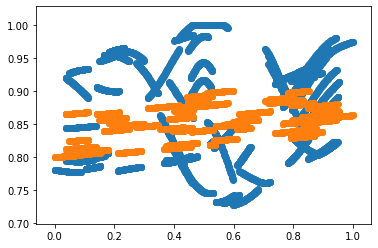

In [39]:
import tensorflow.keras as K
from tensorflow.keras.callbacks import EarlyStopping
import os
import random
import pandas as pd
import matplotlib.pyplot as plt

def run_model(opt, split, epochs_, first, *args):
# loads all well log data into a list
    X_train = []
    X_test = []
    for i in os.listdir("data"):
        if i != 'well production.csv':
            if random.randint(0, 1):
                X_train.append(pd.read_csv("data/" + i))
            else: X_test.append(pd.read_csv("data/" + i))

# combines all well log data into a dataframe
    X_train = pd.concat(X_train).reset_index()
    X_test = pd.concat(X_test).reset_index()

# removes columns that might be redundant/problematic
    X_train = X_train[['easting', 'northing', 'oil saturation']]
    X_test = X_test[['easting', 'northing', 'oil saturation']]

    print(X_train.describe())
    print(X_test.describe())

# separates our dependent variable out
    y_train = X_train.pop('oil saturation')
    y_test = X_test.pop('oil saturation')

    
    X_temp = X_train.append(X_test)
    #normalize
    X_train = (X_train - X_temp.min())/(X_temp.max() - X_temp.min())
    X_test = (X_test - X_temp.min())/(X_temp.max() - X_temp.min())

# sets up our the neural network
    model = K.models.Sequential([K.layers.Dense(first, input_shape=[2,])])

    for i in args:
        model.add(K.layers.Dense(i))

    model.add(K.layers.Dense(1))

    #model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

    model.compile(optimizer=opt, loss='mean_squared_error')

    early_stopping = EarlyStopping(monitor='val_loss', min_delta=.001, patience=10, restore_best_weights=True)

# fits model to data
    history = model.fit(X_train, y_train, epochs=epochs_, validation_data=(X_test, y_test), callbacks=[early_stopping])
    y_pred = model.predict(X_test)
    plt.scatter(X_test['easting'], y_test)
    plt.scatter(X_test['easting'], y_pred)
    #print(len(X_train), len(X_test))
    return model

optimizer = K.optimizers.Adam(learning_rate=0.005, beta_1=0.9, beta_2=.999, amsgrad=False)

model = run_model(optimizer, .5, 100, 10, 10, 10)

         index   easting  northing  porosity  permeability  Poisson's ratio  \
0     0.000000  0.182021  0.590957  0.333333      0.067568         0.357895   
1     0.010101  0.182530  0.590957  0.333333      0.067568         0.357895   
2     0.020202  0.183050  0.590957  0.000000      0.000000         0.357895   
3     0.030303  0.183560  0.590957  0.000000      0.000000         0.357895   
4     0.040404  0.184080  0.590957  0.333333      0.067568         0.347368   
...        ...       ...       ...       ...           ...              ...   
5895  0.959596  0.661379  0.680336  0.500000      0.202703         0.642105   
5896  0.969697  0.662316  0.680336  0.500000      0.189189         0.642105   
5897  0.979798  0.663262  0.680336  0.500000      0.189189         0.642105   
5898  0.989899  0.664198  0.680336  0.416667      0.162162         0.642105   
5899  1.000000  0.665134  0.680336  0.416667      0.162162         0.642105   

      Young's Modulus  thickness (ft)  
0          

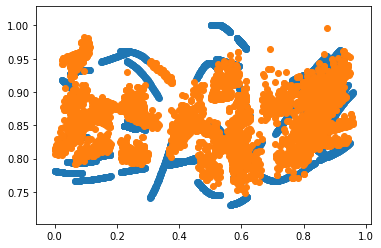

In [40]:


def run_model(opt, split, epochs_, first, *args):
# loads all well log data into a list
    X_train = []
    X_test = []
    for i in os.listdir("data"):
        if i != 'well production.csv':
            if random.randint(0, 1):
                X_train.append(pd.read_csv("data/" + i))
            else: X_test.append(pd.read_csv("data/" + i))

# combines all well log data into a dataframe
    X_train = pd.concat(X_train)
    X_test = pd.concat(X_test)

# removes columns that might be redundant/problematic
    X_train = X_train.drop(columns=['water saturation', 'proppant weight (lbs)', 'pump rate (cubic feet/min)']).reset_index()
    X_test = X_test.drop(columns=['water saturation', 'proppant weight (lbs)', 'pump rate (cubic feet/min)']).reset_index()
        
# separates our dependent variable out
    y_train = X_train.pop('oil saturation')
    y_test = X_test.pop('oil saturation')

    X_temp = X_train.append(X_test)
    #normalize
    X_train = (X_train - X_temp.min())/(X_temp.max() - X_temp.min())
    X_test = (X_test - X_temp.min())/(X_temp.max() - X_temp.min())
    
    print(X_train)
    print(X_test)
    
# sets up our the neural network
    model = K.models.Sequential([K.layers.Dense(first, input_shape=[8,])])

    for i in args:
        model.add(K.layers.Dense(i))

    model.add(K.layers.Dense(1))

    #model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

    model.compile(optimizer=opt, loss='mean_squared_error')

    early_stopping = EarlyStopping(monitor='val_loss', min_delta=100, patience=10,
            restore_best_weights=True)

# fits model to data
    history = model.fit(X_train, y_train, epochs=epochs_, validation_data=(X_test, y_test), callbacks=[early_stopping])
    y_pred = model.predict(X_test)
    plt.scatter(X_test['easting'], y_test)
    plt.scatter(X_test['easting'], y_pred)

    return model.to_json()

optimizer = K.optimizers.Adam(learning_rate=0.005, beta_1=0.9, beta_2=.999, amsgrad=False)

info = run_model(optimizer, .5, 100, 10, 10)
